In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv("F:\Data science and ML\Data_Sets\Titanic\Train.csv")
train=train_data.copy()

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
cols=["PassengerId","Name","Ticket","Embarked","Cabin"]

In [5]:
train.drop(cols,inplace=True,axis=1)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
train["Age"].fillna(train["Age"].mean(),inplace=True)

In [9]:
train.Age.nunique()

89

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 45.3+ KB


In [11]:
x=train.drop("Survived",axis=1)

In [12]:
x=pd.get_dummies(x,drop_first=True)

In [13]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,train["Survived"],test_size=0.25,random_state=1)

# LogisticRegression

In [16]:
logis=LogisticRegression()

In [17]:
logis.fit(x_train,y_train)

LogisticRegression()

In [18]:
predict=logis.predict(x_test)
predict

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

In [19]:
accuracy_score(y_test,predict)

0.8026905829596412

In [20]:
confusion_matrix(y_test,predict)

array([[110,  18],
       [ 26,  69]], dtype=int64)

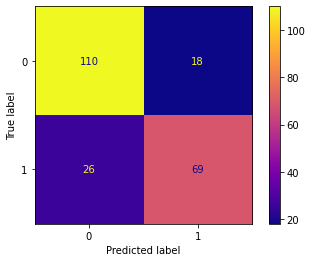

In [21]:
plot_confusion_matrix(logis,x_test,y_test,cmap="plasma")

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn=KNeighborsClassifier()

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
predict1=knn.predict(x_test)

In [26]:
accuracy_score(y_test,predict1)

0.7130044843049327

In [27]:
confusion_matrix(y_test,predict1)

array([[109,  19],
       [ 45,  50]], dtype=int64)

In [28]:
acc=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict_i=knn.predict(x_test)
    acc.append(accuracy_score(y_test,predict_i).round(2)*100)
print(max(acc))

73.0


In [29]:
x.corr()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
Pclass,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Sex_male,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


In [30]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [31]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Prediction of test data

In [32]:
test_data = pd.read_csv("F:\Data science and ML\Data_Sets\Titanic\Test.csv")
test = test_data.copy()

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [35]:
test.drop(cols,axis=1,inplace=True)

In [36]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [37]:
test=pd.get_dummies(test,drop_first=True)

In [38]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [39]:
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      418 non-null    float64
 5   Sex_male  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.8 KB


In [41]:
pre=logis.predict(test)

In [42]:
pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [43]:
len(pre)

418

In [44]:
res=pd.DataFrame(pre)

In [45]:
pd.set_option('display.max_rows', 5400)
pd.set_option('display.max_colwidth', 500)

In [46]:
res

,0
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


# Support Vector Machines

In [47]:
from sklearn.svm import SVC

In [48]:
svm=SVC(kernel="linear")

In [49]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
predict2=svm.predict(x_test)

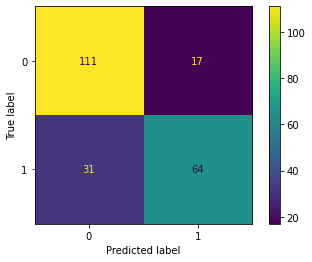

In [51]:
plot_confusion_matrix(svm,x_test,y_test)

In [52]:
accuracy_score(predict2,y_test)

0.7847533632286996

In [53]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [54]:
pre1=svm.predict(test)

In [55]:
res1=pd.DataFrame(pre1)

In [56]:
res1

,0
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


# with more variables

In [57]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [58]:
train.drop(["Parch","SibSp"],axis=1,inplace=True)

In [59]:
train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [60]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [61]:
train = pd.get_dummies(train,drop_first=True)
train.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [62]:
train_x,test_x,train_y,test_y = train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size = 0.25,random_state = 1)

In [63]:
train_x.head()

,Pclass,Age,Fare,Sex_male
35,1,42.000000,52.0000,1
46,3,29.699118,15.5000,1
453,1,49.000000,89.1042,1
291,1,19.000000,91.0792,0
748,1,19.000000,53.1000,1


In [64]:
train_y.shape

(668,)

In [65]:
test_y.head()

862    1
223    0
84     1
680    0
535    1
Name: Survived, dtype: int64

In [66]:
logis.fit(train_x,train_y)

LogisticRegression()

In [67]:
predict = logis.predict(test_x)

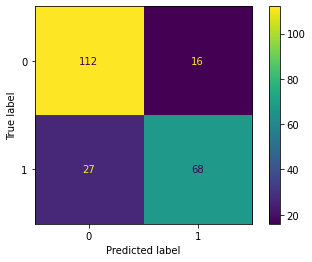

In [68]:
plot_confusion_matrix(logis,test_x,test_y)

In [69]:
accuracy_score(predict,test_y)

0.8071748878923767

In [70]:
knn.fit(train_x,train_y)
predict = knn.predict(test_x)
accuracy_score(predict,test_y)

0.6098654708520179

In [71]:
acc=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    predict_i=knn.predict(test_x)
    acc.append(accuracy_score(test_y,predict_i).round(2)*100)
print(max(acc))

71.0


In [72]:
svm.fit(train_x,train_y)
predict = svm.predict(test_x)
accuracy_score(predict,test_y)

0.7847533632286996

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [74]:
ran = RandomForestClassifier()

In [75]:
ran.fit(train_x,train_y)

RandomForestClassifier()

In [78]:
pred = ran.predict(test_x)

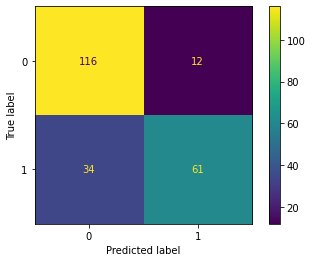

In [82]:
plot_confusion_matrix(ran,test_x,test_y)
plt.show()

In [80]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       128
           1       0.84      0.64      0.73        95

    accuracy                           0.79       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.79      0.79       223



In [86]:
predict = ran.predict(test.drop(["SibSp","Parch"],axis=1))

In [87]:
predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [96]:
res2 = pd.DataFrame(predict,columns=["result"])

In [98]:
res2.to_csv("F:/Data science and ML/Data_Sets/Titanic/result.csv", index = False)